In [1]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install scipy

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.10/libexec/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.10/libexec/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.10/libexec/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/3.0.10/libexec/bin/python3 -m pip install --upgrade pip' command.


# *Metody obliczeniowe/Metody numeryczne*
## *Laboratorium 2*
## *Rozwiązywanie równań nieliniowych*

## Spis treści

* [Wstęp](#wstep)
* [Przykład 1. Rozwiązywanie równań nieliniowych](#rrn)
* [Przykład 2. Krótko o pandas](#pandas)
* [Ćwiczenie 1](#cw1)
* [Metoda bisekcji](#bisect)
* [Ćwiczenie 2](#cw2)
* [Regula falsi](#rfalsi)
* [Ćwiczenie 3](#cw3)    
* [Metoda siecznych](#secant)
* [Ćwiczenie 4](#cw4)    
* [Metoda Newtona](#newton)
* [Ćwiczenie 5](#cw5)
* [Metoda Newtona dla układów równań nieliniowych](#newton_nles)
* [Przykład 3. Wyznaczanie pochodnych cząstkowych](#pcz)
* [Ćwiczenie 6](#cw6)
* [Ćwiczenie 7](#cw7)
* [Ćwiczenie 8](#cw8)
* [Ćwiczenie 9](#cw9)
* [Ćwiczenie 10](#cw10)

## Wstęp <a class="anchor" id="wstep"></a>

<div align="justify">
Równaniem nieliniowym nazywa się równanie w którym jedna lub więcej zmiennych występuje nieliniowo, np. funkcje trygonometryczne lub wielomian trzeciego stopnia. Rozwiązywanie takich równań(funkcji) polega na znajdowaniu takiego x dla którego f(x) = 0. Na tym laboratorium będą omawianie iteracyjne metody rozwiązywania takich równań, czyli takie które z każdą kolejną iteracją (krokiem), są coraz bliżej rozwiązania. Pierwszym krokiem przy iteracyjnym rozwiązywaniu zadań, jest upewnienie się że dane równanie posiada miejsce zerowe. Następnym krokiem jest wybór odpowiedniego algorytmu. Kolejnym krokiem jest wybór warunku stopu, czyli określenie jakie przybliżenie jest dla nas zadowalające i można przerwać iterację. Istnieją na to trzy sposoby: 
</div>


* grube stopowanie na osi OY: 

\begin{equation}
    |f(x_n)| < tol_{1}
\end{equation}


* grube stopowanie na osi OX:

\begin{equation}
|x_n - x_{n-1}| < tol_{2}
\end{equation}


* drugi sposób i sprawdzanie zmiany pomiędzy dwoma kolejnymi przybliżeniami:

\begin{equation}
|x_n - x_{n-1}| < tol_{2} \wedge |x_{n} - x_{n-1}| \leq |x_{n-1} - x_{n-2}|
\end{equation}
<br>
<div align="justify">
Pierwszy z nich i zarazem najbardziej naiwny, sprawdza odległość pomiędzy wartością funkcji w wyznaczonym przybliżeniu a dokładnością, która jest bardzo bliska zeru. Drugi sposób porównuje odległość pomiędzy dwoma kolejnymi przybliżeniami pierwiastka, natomiast trzeci jest  rozszerzeniem drugiego warunku - dodatkowo sprawdzana jest różnica pomiędzy dwoma ostatnimi przybliżeniami. Trzeci warunek może być stosowany tylko dla metod rekurencyjnych. W ćwiczeniach będzie stosowany pierwszy warunek, gdyż można go zastosować do wszystkich omawianych algorytmów.
</div>
<!-- 1. pseudo kody czy z teori przesunac od cwiczen zeby nie scrollowac
2. opisy funkcji zwracane wartosci/parametry
3. newton nles na koniec czy bezposrednio po newtonie
4. numeracja rownan
5. zapisywanie danych z kazdej iteracji zostawic/usunac, ewentualnie printy przy kazdej iteracji
6. funkcje bledu
7. teoria do wstepu i newton nles
8. czcionka?
9. krotki pdf jak pobrac, ewentualnie przewodnik po jupyterze/numpy i plt -->


## Przykład 1. Rozwiązywanie równań nieliniowych <a class="anchor" id="rnn"></a>

<div align="justify">
Do rozwiązywania równań nieliniowych (m.in.) służą pakiety SciPy oraz SymPy. Pierwszy z nich służy do obliczeń numerycznych, drugi natomiast do symbolicznych. Najpopularniejszą funkcją z pierwszego pakietu która rozwiązuje równania jest funkcja <i>fsolve</i>. Jako argumenty funkcja ta przyyjmuje funkcję w postaci wielomianiu, oraz tablicę pierwszych przybliżeń. Metodę tą można stosować zarówno dla pojedynczych równań jak ich układów. Funkcja ta jest wrapperem dla zdefiniowanych w pakiecie <b>MINPACK</b> algorytmów <i>hybrd</i> oraz <i>hybrj</i>. Poniżej przedstawiono przykład jej użycia. 
</div>

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy import sign
from scipy.optimize import fsolve 

# rozwiązywanie pojedyńczego równania kwadratowego x^2 + x - 5 = 0, 
# posiadającego dwa pierwiastki
fun = lambda x: x ** 2 + x - 5

# tablica pierwszych przybliżeń
xguess = [-4, 2]

roots = fsolve(fun, xguess)
y = fun(roots)

print(f"x = {roots} \ny = {y}")

# sprawdzenie czy wartości y obliczonych pierwiastków są bliskie 0
print(np.isclose(y, [0.0, 0.0]))

x = [-2.79128785  1.79128785] 
y = [0.0000000e+00 8.8817842e-16]
[ True  True]


## Przykład 2. Krótko o pandas <a class="anchor" id="pandas"></a>

<div align="justify">
Pandas to biblioteka, powszechnie używana w szeroko rozumianym data science. Udostępnia ona zestaw narzędzi do analizy i obróbki danych, z których najbardziej znanym jest klasa DataFrame - dwuwymiarowa tablica do przechowywania danych. 


* klasa Series <br>
można porównać ją do kolumny w tablicy

```python
import pandas as pd

pdk = [2, 1, 3, 7]

# tworzenie z tablicy, indeks domyślny (czyli numeracja rzędów od 0)
s = pd.Series(pdk)

print(s)

# 0    2
# 1    1
# 2    3
# 3    7
# dtype: int64

d = {'jeden': 1, 'dwa' : 2}

# tworzenie ze słownika, indeks jako klucz
s = pd.Series(d)

print(s)

# jeden    1
# dwa      2
# dtype: int64
```


* klasa DataFrame <br>
można nazwać ją połączeniem Excela z kolumną z bazy danych

```python
import pandas as pd

dane = {'Imie': ['Andrzej', 'Karol', 'Marta'],
        'Rok urodzenia': [1998, 2001, 1995]}

# tworzenie obiektu DataFrame z indeksem domyślnym
df = pd.DataFrame(dane)

print(df)

#       Imie  Rok urodzenia
# 0  Andrzej           1998
# 1    Karol           2001
# 2    Marta           1995


# odwoływanie się do kolumny odbywa się za pomocą jej nazwy
print(df['Imie'])

# 0    Andrzej
# 1      Karol
# 2      Marta
# Name: Imie, dtype: object


# odwoływanie się do wiersza za pomocą indeksu odbywa się za pomocą funkcji loc
print(df.loc[1])

# Imie             Karol
# Rok urodzenia     2001
# Name: 1, dtype: object

# można też odwoływać się do wielu wierszy jednocześnie
print(df.loc[[0, 2]])

#       Imie  Rok urodzenia
# 0  Andrzej           1998
# 2    Marta           1995

# do wstępnej analizy zestawu danych przydatne są funkcje head, tail oraz info
# które służą do wyświetlania kolejno 5 pierwszych, 5 ostatnich rekordów oraz informacji o danych

df.head()
df.tail()
df.info()

```
</div>

## Ćwiczenie 1 <a class="anchor" id="cw1"></a>

<div align="justify">
Napisz funkcję $fun1$ będącą implementacją wzoru
\begin{equation}
f(x) = x^3+x^2-3x-3
\tag{1}
\end{equation}


Do rozwiązania tego punktu można użyć operatora potęgowania **\*\***, a sam wzór zdefiniować jako zwyczajną <a href="https://www.w3schools.com/python/python_functions.asp">funkcję</a> lub wyrażenie <a href="https://www.w3schools.com/python/python_lambda.asp">lambda</a>.
</div>

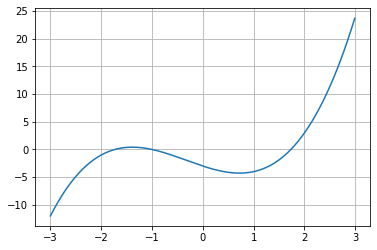

In [3]:
# Przedział zawierający zgrubne położenie miejsc zerowych
x = np.arange(-3, 3, 0.01) 

# Zdefiniowanie funkcji 
# TODO
# fun1 = ...
# lub 
# def fun1(x): ...

# Wartości funkcji na przedziale x
y = fun1(x)

# Wykres pozwalający na dokładniejsze oszacowanie miejsc zerowych
plt.plot(x, y)
plt.grid(True)
plt.show()

## Metoda bisekcji <a class="anchor" id="bisect"></a>
<div align="justify">
Metoda ta polega na iteracyjnym wyznaczaniu coraz mniejszych przedziałów, co do których mamy pewność, że zawierają zero funkcji. Załóżmy, że dana jest funkcja $f(x)$, która jest ciągła w przedziale $[a,b]$ i przyjmuje na jego brzegach wartości o przeciwnych znakach ($f(a)f(b)<0$). W takim przypadku przedział $[a,b]$ musi zawierać pierwiastek funkcji. Za przybliżone rozwiązanie możemy uznać punkt leżący w środku przedziału $[a,b]$, czyli:

\begin{equation}
c = \frac{a+b}{2}
\tag{2}
\end{equation}
</div>
<br>
<div align="justify">
W przypadku gdy $f(c)=0$ miejsce zerowe zostało odnalezione. Z reguły jednak $f(c) \neq 0$ i poszukiwania trzeba kontynuować. Zero będzie znajdować się albo w przedziale $[a,c]$, albo w przedziale $[c,b]$. Aby wybrać właściwy przedział wystarczy sprawdzić wartość funkcji w punkcie $c$. Jeśli $f(a)f(c)<0$ kontynuujemy proces w przedziale $[a,c]$, jeśli $f(c)f(b)<0$ oznacza to, że w następnej iteracji wartość $c$ będzie trzeba podstawić w miejsce $a$. Iteracje można przerywać jeśli odnaleziona wartość $f(c)< tol$, gdzie $tol$ jest zadaną przez nas wartością.
</div>
<br>
<div align="justify">
Metoda bisekcji jest wolno zbieżna (zbieżność jest liniowa), gdyż w ogóle nie korzysta z informacji jakie daje kształt funkcji $f(x)$. Jej niewątpliwą zaletą jest natomiast to, że jest pewna. Bisekcja sprawuje się dobrze, tam gdzie inne (szybsze) metody mają problemy. W obliczeniach numerycznych jest rzadko używana osobno. Za to często stosuje się ją do początkowego przybliżenia przedziału zawierającego miejsce zerowe funkcji, aby potem skorzystać z szybszych metod.
    
</div>
Pseudo kod dla metody bisekcji:
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">

&nbsp;<b>Wejście:</b>
<ul>
    <li> fun &larr; funkcja, dla której szukamy miejsca zerowego </li>
    <li> a, b &larr; granice przedziału w którym znajduje się pierwiastek </li>
    <li> tol &larr; żądana dokładność </li>
    <li> i_max &larr; maksymalna ilość iteracji </li>
</ul>  
    
&nbsp;<b>Wyjście:</b>
<ul>
    <li> i &rarr; liczba iteracji </li>
    <li> c &rarr; znalezione przybliżenie pierwiastka </li>
    <li> fc &rarr; wartość funkcji w punkcie c </li>
</ul>
    
&nbsp;<b>Algorytm:</b>
<ul style="list-style-type: none;"> 
    <li> fa &larr; fun(a) </li>
    <li> fb &larr; fun(b) </li>
    <li> <b>if </b> <i> sign(fa) == sign(fb) </i> <b> then </b> <br>
         &nbsp;<b>return</b> <i> error </i>  <br>
        <b> end if </b> </li>
    <li> <b> for </b> i &larr; 1 <b> to </b> i_max <b> do </b> <br>
        <ul style="list-style-type: none;"> 
         <li> c &larr; (a + b) / 2 </li>
         <li> fc &larr; fun(c) </li>
         <li> e &larr; (b - a) / 2 <br> 
         <li> <b> if </b> <i> |fc| < dok </i> <b> then </b> </li>
         <li> &nbsp; <b>return</b> i, c fc </li>
         <li> <b> end if </b> </li> </li>
         <li> <b>if </b> <i> sign(fc) != sign(fa) </i> <b> then </b> </li>
         <li> &nbsp; b &larr; c </li>
         <li> &nbsp; fb &larr; fc </li>
         <li> <b>else </b> </li>
         <li> &nbsp; a &larr; c</li>
         <li> &nbsp; fa &larr; fc </li>
         <li> <b> end if </b> </li>
        </ul>
    <li> <b> end for </b> </li> 
</ul>
</div>


## Ćwiczenie 2 <a class="anchor" id="cw2"></a>

<div align="justify">
Uzupełnij kod funkcji implementującej metodę bisekcji. Znajduje się on w poniższej komórce. 

Jej wywołanie wygląda następująco:
```python
[c,  yc,  df] = bisect(fun,  a,  b,  i_max,  dok)
```

gdzie jej parametry to:

* &ensp;fun &larr; funkcja, dla której szukamy miejsca zerowego
* &ensp;a, b &larr; granice przedziału w którym znajduje się pierwiastek 
* &ensp;dok &larr; żądana dokładność 
* &ensp;i_max &larr; maksymalna ilość iteracji 
    
a zwracane wartości to:

* &ensp;c &rarr; znalezione przybliżenie pierwiastka 
* &ensp;yc &rarr; wartość funkcji dla znalezionego przybliżenia pierwiastka 
* &ensp;df &rarr; obiekt DataFrame z danymi z każdej iteracji
</div>


In [128]:
def bisect(fun, a, b, i_max, dok):
    """
    :param fun: funkcja
    :param a: początek przedziału
    :param b: koniec przedziału
    :param i_max: maksymalna liczba iteracji
    :param dok: dokładność
    :return: (przybliżona wartość pierwiastka, wartość funkcji od przybliżenia, tablica z danymi z każdej iteracji)
    """
    
    if i_max < 1:
        raise ValueError("i_max musi być większe od 0")

    # Wartości funkcji na krańcach zadanego przedziału
    ya = fun(a)
    yb = fun(b)

    # Sprawdzenie czy podano poprawne wartości krańcowe
    if ya * yb > 0:
        raise ValueError("Wartości funkcji nie posiadają różnych znaków na początku i końcu przedziału")

        
    df = pd.DataFrame(columns=["Krok", "a", "b", "c", "yc", "błąd"])
    
    for i in range(i_max):
        # TODO
        # c = ...
        yc = fun(c)
        err = (b - a) / 2

        df = df.append(pd.Series(data={"Krok": i + 1, "a": a, "b": b, "c": c, "yc": yc, "błąd": err}), 
                       ignore_index=True)

        # Sprawdzenie zbieżności
        if abs(yc) < dok:
            print(f"Metoda bisekcji zbieżna po {i + 1} iteracjach")
            break

        if sign(ya) == sign(yc):
            a = c
            ya = yc
        else:
            b = c
            yb = yc


    else:
        #
        print("Funkcja nie mogła znaleźć przybliżenia z zadaną dokładnością w podanej liczbie iteracji")
        
    df = df.astype({"Krok": "int64"})
    df = df.set_index("Krok")
    
    return c, yc, df

a, b , c = bisect(lambda x: x*x + x -3, 3, 1, 100, 0.1)
c

Metoda bisekcji zbieżna po 5 iteracjach


,a,b,c,yc,błąd
Krok,,,,,
1,3.00,1.00,2.00,3.00,-1.00
2,2.00,1.00,1.50,0.75,-0.50
3,1.50,1.00,1.25,-0.19,-0.25
4,1.50,1.25,1.38,0.27,-0.12
5,1.38,1.25,1.31,0.04,-0.06


## Regula falsi <a class="anchor" id="rfalsi"></a>

<div align="justify">
Pierwszym sposobem na to, aby wykorzystać informacje o kształcie funkcji do przyspieszenia zbieżności poszukiwania zera jest aproksymacja funkcji $f(x)$ za pomocą linii prostej. W metodzie regula falsi, podobnie jak metodzie połowienia zaczynamy od przedziału $[a,b]$, na którym spełniony jest warunek $f(a)f(b)<0$. Przybliżoną wartością pierwiastka w każdym następnym kroku  będzie miejsce przecięcia osi OX i linii przechodzącej przez punkty $(a,f(a))$ i $(b,f(b))$, tzn:
</div>

\begin{equation}
c = b - \frac{b-a}{f(b)-f(a)}f(b)
    \tag{3}
\end{equation}
<br>
<div align="justify">
Jeśli zero znajduje się w przedziale $[a,c]$ zmienną $a$ pozostawiamy bez zmian i podstawiamy $b = c$; w przeciwnym przypadku przypisujemy $a=c$, z kolei $b$ pozostaje takie samo.
</div>

Pseudo kod dla metody regula falsi:
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">

&nbsp;<b>Wejście:</b>
<ul>
    <li> fun &larr; funkcja, dla której szukamy miejsca zerowego </li>
    <li> a, b &larr; granice przedziału w którym znajduje się pierwiastek </li>
    <li> dok &larr; żądana dokładność </li>
    <li> i_max &larr; maksymalna ilość iteracji </li>
</ul>  
    
&nbsp;<b>Wyjście:</b>
<ul>
    <li> i &rarr; liczba iteracji </li>
    <li> c &rarr; znalezione przybliżenie pierwiastka </li>
    <li> fc &rarr; wartość funkcji w punkcie c </li>
</ul>
    
&nbsp;<b>Algorytm:</b>
<ul style="list-style-type: none;"> 
    <li> fa &larr; fun(a) </li>
    <li> fb &larr; fun(b) </li>
    <li> <b>if </b> <i> sign(fa) == sign(fb) </i> <b> then </b> <br>
         &nbsp;<b>return</b> <i> error </i>  <br>
        <b> end if </b> </li>
    <li> <b> for </b> i &larr; 1 <b> to </b> i_max <b> do </b> <br>
        <ul style="list-style-type: none;"> 
         <li> c &larr;  b - (b - a) / (fb - fa) * fb </li>
         <li> fc &larr; fun(c) </li>
         <li> <b> if </b> |fc| < dok <b> then </b> </li>
         <li> &nbsp; <b>return</b> i, c fc </li>
         <li> <b> end if </b> </li> </li>
         <li> <b>if </b> <i> sign(fc) != sign(fa) </i> <b> then </b> </li>
         <li> &nbsp; b &larr; c </li>
         <li> &nbsp; fb &larr; fc </li>
         <li> <b>else </b> </li>
         <li> &nbsp; a &larr; c</li>
         <li> &nbsp; fa &larr; fc </li>
         <li> <b> end if </b> </li>
        </ul>
    <li> <b> end for </b> </li> 
</ul>
</div>


## Ćwiczenie 3 <a class="anchor" id="cw3"></a>

Uzupełnij kod funkcji implementującej metodę regula falsi.

<!-- Jej wywołanie wygląda następująco:
```python
[c,  yc,  details] = bisect(fun,  a,  b,  i_max,  dok)
```

gdzie jej parametry to:

&ensp;fun &larr; funkcja, dla której szukamy miejsca zerowego \
&ensp;a, b &larr; granice przedziału w którym znajduje się pierwiastek \
&ensp;dok &larr; żądana dokładność \
&ensp;i_max &larr; maksymalna ilość iteracji  -->
    

In [5]:
def rfalsi(fun, a, b, i_max, dok):
    """
    :param fun: funkcja
    :param a: początek przedziału
    :param b: koniec przedziału
    :param i_max: maksymalna liczba iteracji
    :param dok: dokładność
    :return: (przybliżona wartość pierwiastka, wartość funkcji od przybliżenia, tablica z danymi z każdej iteracji)
    """
    
    if i_max < 1:
        raise ValueError("i_max musi być większe od 0")

    # Wartości funkcji na krańcach zadanego przedziału
    ya = fun(a)
    yb = fun(b)
    
    # Sprawdzenie czy podano poprawne wartości krańcowe
    if ya * yb > 0:
        raise ValueError("Wartości funkcji nie posiadają różnych znaków na początku i końcu przedziału")

    df = pd.DataFrame(columns=["Krok", "a", "b", "c", "yc"])
    
    for i in range(i_max):
        # TODO
        # c = ...
        yc = fun(c)

        df = df.append(pd.Series(data={"Krok": i + 1, "a": a, "b": b, "c": c, "yc": yc}), 
                       ignore_index=True)
        
        # Sprawdzenie zbieżności
        if abs(yc) < dok:
            print(f"Regula falsi zbieżna po {i + 1} krokach")
            break

        if sign(ya) == sign(yc):
            a = c
            ya = yc
        else:
            b = c
            yb = yc
        
    else:
        print("Funkcja nie mogła znaleźć przybliżenia z zadaną dokładnością w podanej liczbie iteracji")

    df = df.astype({"Krok": "int64"})
    df = df.set_index("Krok")
    
    return c, yc, df

a, b , c = rfalsi(lambda x: x*x + x - 5, -6, 1, 100, 0.1)
c

Regula falsi zbieżna po 8 krokach


,a,b,c,yc
Krok,,,,
1,-6.0,1.000000,0.250000,-4.687500
2,-6.0,0.250000,-0.736842,-5.193906
3,-6.0,-0.736842,-1.642202,-3.945375
4,-6.0,-1.642202,-2.236188,-2.235652
5,-6.0,-2.236188,-2.545142,-1.067393
6,-6.0,-2.545142,-2.686610,-0.468737
7,-6.0,-2.686610,-2.747591,-0.198335
8,-6.0,-2.747591,-2.773190,-0.082605


## Metoda siecznych <a class="anchor" id="secant"></a>

<div align="justify">
Podobnie jak w metodzie regula falsi, tak i w tej funkcja $f(x)$ jest aproksymowana linią prostą. Jednak metoda siecznych nie wymaga, aby w każdej iteracji sprawdzać przedział, w którym znajduje się pierwiastek. Aby rozpocząć algorytm wymagane są dwa przybliżenia pierwiastka ($x_0,x_{1}$) i <b>nie musi</b> być spełniony warunek $f(x_0)f(x_{1})<0$. Kolejne aproksymowane wartości pierwiastka znajdujemy (podobnie jak w powyższej metodzie) jako miejsce przecięcia się osi OX i linii przechodzącej przez dwie ostatnie aproksymacje pierwiastka $(x_{k-1},f(x_{k-1}))$ i $(x_{k},f(x_{k}))$.
</div>
<br>
\begin{equation}
x_{k+1} = x_k - \frac{x_k-x_{k-1}}{f(x_k)-f(x_{k-1})}f(x_k)
    \tag{4}
\end{equation}
<br>
</div>
Pseudo kod dla metody siecznych: 

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">

&nbsp;<b>Wejście:</b>
<ul>
    <li> fun &larr; funkcja, dla której szukamy miejsca zerowego </li>
    <li> xn0, xn1 &larr; dwa pierwsze przybliżenia pierwiastka </li>
    <li> dok &larr; żądana dokładność </li>
    <li> i_max &larr; maksymalna ilość iteracji </li>
</ul>  
    
&nbsp;<b>Wyjście:</b>
<ul>
    <li> i &rarr; liczba iteracji </li>
    <li> xn2 &rarr; znalezione przybliżenie pierwiastka </li>
    <li> fn2 &rarr; wartość funkcji w punkcie xn2 </li>
</ul>
    
&nbsp;<b>Algorytm:</b>
<ul style="list-style-type: none;"> 
    <li> <b> for </b> i &larr; 1 <b> to </b> i_max <b> do </b> <br>
        <ul style="list-style-type: none;"> 
         <li> fn0 &larr; fun(xn0) </li>
         <li> fn1 &larr; fun(xn1) </li>
         <li> xn2 &larr; xn1 - (xn1 - xn0) / (fn1 - fn0) * fn1 </li>
         <li> fn2 &larr; fun(xn2) </li>
         <li> xn0 &larr; xn1 </li>
         <li> xn1 &larr; xn2 </li>
         <li> <b>if </b> <i> |fn2| < dok </i> <b> then </b> </li>
              <li> &nbsp; <b>return</b> i, xn2, fn2 </li>
         <li> <b> end if </b> </li>
        </ul>
    <li> <b> end for </b> </li> 
</ul>
</div>


## Ćwiczenie 4 <a class="anchor" id="cw4"></a>

Uzupełnij kod funkcji implementującej metodę siecznych.

In [13]:
def secant(fun, xn0, xn1, i_max, dok):
    """
    :param fun: funkcja
    :param xn0: pierwsze przybliżenie pierwiastka
    :param xn1: drugie przybliżenie pierwiastka
    :param i_max: maksymalna liczba iteracji
    :param dok: dokładność
    :return: (przybliżona wartość pierwiastka, wartość funkcji od przybliżenia, tablica z danymi z każdej iteracji)
    """
    
    if i_max < 1:
        raise ValueError("i_max musi być większe od 0")

    df = pd.DataFrame(columns=["Krok", "x_n", "x_n+1", "x_n+2", "f(x_n+2)"])
    
    for i in range(i_max):
        
        # Wartości funkcji w dwóch pierwszych przybliżeniach
        yn0 = fun(xn0)
        yn1 = fun(xn1)
        
        # TODO
        # xn2 = ...
       
        yn2 = fun(xn2)

        df = df.append(pd.Series(data={"Krok": i + 1, "x_n": xn0, "x_n+1": xn1, "x_n+2": xn2, "f(x_n+2)": yn2}), 
                                 ignore_index=True)
        
        # Sprawdzenie zbieżności
        if abs(yn2) < dok:
            print(f"Metoda siecznych zbieżna po {i + 1} krokach")
            break

        xn0, xn1 = xn1, xn2

    else:
        print("Funkcja nie mogła znaleźć przybliżenia z zadaną dokładnością w podanej liczbie iteracji")

    df = df.astype({"Krok": "int64"})
    df = df.set_index("Krok")
    
    
    return xn2, yn2, df

a, b, c = secant(lambda x: x*x + x - 5, -6, 1, 100, 0.01)
c
print(c.to_latex())

Metoda siecznych zbieżna po 5 krokach
\begin{tabular}{lrrrr}
\toprule
{} &       x\_n &     x\_n+1 &     x\_n+2 &  f(x\_n+2) \\
Krok &           &           &           &           \\
\midrule
1    & -6.000000 &  1.000000 &  0.250000 & -4.687500 \\
2    &  1.000000 &  0.250000 &  2.333333 &  2.777778 \\
3    &  0.250000 &  2.333333 &  1.558140 & -1.014062 \\
4    &  2.333333 &  1.558140 &  1.765452 & -0.117729 \\
5    &  1.558140 &  1.765452 &  1.792681 &  0.006386 \\
\bottomrule
\end{tabular}



## Metoda Newtona <a class="anchor" id="newton"></a>
<div align="justify">
W metodzie Newtona jako aproksymację funkcji $f(x)$ przyjmujemy styczną do funkcji w $x_k$-tym miejscu. Następnym przybliżenie miejsca zerowego jest przecięcie stycznej z osią OX. Minusem takiego podejścia jest to, że  dodatkowo jest wymagana znajomość pochodnej zadanej funkcji. Metoda ta również nie gwarantuje zbieżności procesu. Jest ona jednak najszybszą z podstawowych metod i stąd często sięga się po nią jako pierwszą. Aby obliczyć
$k+1$-sze przybliżenie pierwiastka funkcji $f(x)$ należy zastosować wzór:
</div>
<br>
\begin{equation}
x_{k+1} = x_k - \frac{f(x_{k})}{f'(x_k)}
    \tag{5}
\end{equation}
    
Pseudo kod dla metody Newtona: 

<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">

&nbsp;<b>Wejście:</b>
<ul>
    <li> fun &larr; funkcja, dla której szukamy miejsca zerowego </li> 
    <li> dfun &larr; pochodna funkcji fun </li>
    <li> xn0 &larr; pierwsze przybliżenia pierwiastka </li>
    <li> tol &larr; żądana dokładność </li>
    <li> i_max &larr; maksymalna ilość iteracji </li>
</ul>  
    
&nbsp;<b>Wyjście:</b>
<ul>
    <li> i &rarr; liczba iteracji </li>
    <li> xn1 &rarr; znalezione przybliżenie pierwiastka </li>
    <li> fn1 &rarr; wartość funkcji w punkcie xn1 </li>
</ul>
    
&nbsp;<b>Algorytm:</b>
<ul style="list-style-type: none;"> 
    <li> <b> for </b> i &larr; 1 <b> to </b> i_max <b> do </b> <br>
        <ul style="list-style-type: none;"> 
         <li> xn1 &larr; xn0 - fun(xn0) / dfun(xn0) </li>
         <li> fn1 &larr; fun(xn1) </li>
         <li> <b>if </b> <i> |fn1| < dok </i> <b> then </b> </li>
              <li> &nbsp; <b>return</b> i, xn2, fn2 </li>
         <li> <b> end if </b> </li>
         <li> xn0 &larr; xn1 </li>
        </ul>
    <li> <b> end for </b> </li> 
</ul>
</div>
</p>

## Ćwiczenie 5 <a class="anchor" id="cw5"></a>

Uzupełnij kod funkcji implementującej metodę Newtona.

In [34]:
def newton(fun, dfun, xn0, i_max, dok):
    """
    :param fun: funkcja
    :param dfun: pochodna funkcji f
    :param xn0: przybliżenie pierwiastka
    :param i_max: maksymalna liczba iteracji
    :param dok: dokładność
    :return: (przybliżona wartość pierwiastka, wartość funkcji od przybliżenia, tablica z danymi z każdej iteracji)
    """
    
    if i_max < 1:
        raise ValueError("i_max musi być większe od 0")

    df = pd.DataFrame(columns=["Krok", "x_n", "x_n+1", "f(x_n+1)"])
    
    for i in range(i_max):
        
        # TODO
        # xn1 = ...
        yn1 = fun(xn1)

        df = df.append(pd.Series(data={"Krok": i + 1, "x_n": xn0, "x_n+1": xn1, "f(x_n+1)": yn1}), 
                                 ignore_index=True)

        if abs(yn1) < dok:
            print(f"Metoda Newtona zbieżna po {i + 1} krokach")
            break

        xn0 = xn1
    else:
        print("Funkcja nie mogła znaleźć przybliżenia z zadaną dokładnością w podanej liczbie iteracji")

    df = df.astype({"Krok": "int64"})
    df = df.set_index("Krok")
        
    return xn1, yn1, df

## Metoda Newtona dla układów równań nieliniowych <a class="anchor" id="newton_nles"></a>
<div align="justify">
Metoda Newtona dla układów równań nieliniowych jest uogólnieniem tej metody dla pojedyńczych równań. Jej algorytm  jest identyczny, wymaga tylko rozszerzenia bazowego równania tak aby pasował dla macierzy równań. W ten sposób dla  układu n równań, funkcja przyjmuje wektor n pierwszych przybliżeń pierwiastków, w miejsce pojedyńczego równania przyjmuje układ równań, a zamiast pochodnej funkcji - macierz pochodnych cząstkowych układu równań, czyli tzw. jakobian. Przytaczając wzór 5 z metody Newtona 
</div>
<br>
\begin{equation}
x_{k+1} = x_k - \frac{f(x_{k})}{f'(x_k)}
\end{equation}
<br>
dla układu równań można przekształcić go do postaci
<br>
\begin{equation}
X_{k+1} - X_{k} =  - Y(X_{k})^{-1}  {J(X_k)}
    \tag{6}
\end{equation}
    <br>
<div align="justify">
Zakładając teraz że lewa strona równania oznacza przyrost, należy rozwiązać równanie <Numer>  korzystając z arytmetyki macierzy
<br>
    
\begin{equation}
dX = -Y(X_{k})^{-1}  {J(X_k)}
    \tag{7}
\end{equation}

W języku Python, takie równanie można rozwiązać z pomocą biblioteki numpy, w następujący sposób:

```python
import numpy as np
    

J = ...
Y = ...
    
dX = -1 * inv(J).dot(Y)
# lub bardziej optymalny sposób
dX = -1 * np.linalg.solve(J, Y)
```

Należy przy tym pamiętać, że <b> dX ma znak ujemny </b>
    
Podstawiając teraz równanie 7 do rownania 6 otrzymuje się wzór na kolejne przybliżenie wektora pierwiastków
    
\begin{equation}
X_{k+1} = X_{k} - dX
    \tag{8}
\end{equation}

Warunkiem stopu dla algorytmu dla układów równań, może być np. norma wektora dX, którą również można wyznaczyć za pomocą biblioteki numpy.
    
```python
import numpy as np
    

norm = np.linalg.norm(dX)
```    
</div>


## Przykład 3. Wyznaczanie pochodnych cząstkowych równań <a class="anchor" id="pcz"></a>

Biorąc za przykład poniższy układ równań

\begin{cases} 
    f_{1} = x^{2} + y^{2} - 25  \\ 
    f_{2} = x + y - 7
\end{cases}
<br>
<div align="justify"> 
składa się on z dwóch równań oraz dwóch niewiadomych. Mówi to o kształcie macierzy Jacobi'ego która będzie miała rozmiar 2x2. Pierwszy rząd tej macierzy będzie się składał kolejno z pochodnej względem zmiennej x, a następnie z pochodnej względem zmiennej y pierwszego równania. Drugi rząd podobnie, tylko pod uwagę brane jest drugie równanie. 
</div>
<br>
\begin{bmatrix}
{\frac{\partial f_{1}}{\partial x}} & {\frac{\partial f_{1}}{\partial y}}\\
{\frac{\partial f_{2}}{\partial x}} & {\frac{\partial f_{2}}{\partial y}}
\end{bmatrix}
<br>
<div align="justify">
Traktując teraz funkcję jako wielomian, pochodna cząstkowa względem $x$, będzie sumą pochodnych wyrazów w których ta zmienna występuje. Jeśli w wyrazie występują inne zmienne pozostają one w tym wyrazie. Czyli np. dla wyrazu 
$x^{2}y$ pochodna cząstkowa względem $x$ będzie wynosić $2xy$. Tak samo postępuje się dla pozostałych zmiennych.
</div>
<br>
Jakobian dla układu równań wygląda następująco:
<br>
\begin{bmatrix}
2x  & 2y \\
1 & 1
\end{bmatrix}   

## Ćwiczenie 6 <a class="anchor" id="cw6"></a>

Uzupełnij kod funkcji implementującej metodę Newtona dla układów równań.

In [131]:
from numpy.linalg import inv, norm


def newton_nles(fun: np.array, jacobian: np.array, Xn0,  i_max, dok):
    """
    :param fun: układ X równań
    :param jacobian: jakobian równań
    :param Xn0: tablica pierwszych X przybliżeń
    :param i_max: maksymalna liczba iteracji
    :param dok: dokładność
    :return: (przybliżona wartość pierwiastka, wartość funkcji od przybliżenia, tablica z danymi z każdej iteracji)
    """
    
    if i_max < 1:
        raise ValueError("i_max musi być większe od 0")
    
    df = pd.DataFrame(columns=["Krok", "X_n", "f(X_n)"])
    
    for i in range(int(i_max)):
        J = jacobian(*Xn0) 
        Y = fun(*Xn0)     
        # TODO
        # dX = ...
        Xn1 = Xn0 - dX
        row = pd.Series(data={"Krok": i + 1, "X_n": Xn1, "f(X_n)": Y})
        df = df.append(row, ignore_index=True)

        if np.linalg.norm(dX) < dok:
            print(f'Metoda Newtona dla układu równań nieliniowych zbieżna po {i + 1} krokach')
            break
            
        Xn0 = Xn1
        
    df = df.astype({"Krok": "uint32"})
    df = df.set_index("Krok")
        
    return Xn1, df

## Ćwiczenie 7 <a class="anchor" id="cw7"></a>

Porównaj zbieżność poszczególnych metod szukając miejsca zerowego dla tych samych parametrów.

## Ćwiczenie 8 <a class="anchor" id="cw8"></a>

Skorzystaj z funkcji omówionej w [przykładzie 1](#rrn), aby obliczyć pierwiastki równania 

\begin{equation}
x^3+x^2-3x-3=0
\tag{9}
\end{equation}

## Ćwiczenie 9 <a class="anchor" id="cw9"></a>
<div align="justify">
Zaproponuj takie dane wejściowe dla metody stycznych/siecznych, aby dla funkcji posiadającej miejsce zerowe w pobliżu pierwszych/-ego przybliżenia/- żeń metoda nie była zbieżna. Jakie cechy funkcji spowodowały rozbieżność?
    Zadanie to można wykonać modyfikując przybliżenie początkowe dla funkcji <i>fun1</i> lub definiując inną/ne funkcję/-je.
</div>

## Ćwiczenie 10 <a class="anchor" id="cw10"></a>

Równanie z [ćwiczenia 8](#cw8) można przekształcić do postaci, która umożliwia wykorzystanie metody iteracji prostej $x=\Phi(x)$ na kilka sposobów, m.in.:


$x = \frac{x^3+x^2-3}{3}$; &ensp;  $x = \sqrt{-x^3+3x+3}$; 


$x = \frac{-x^3+3}{x-3}$;   &ensp;  $x = (-x^2+3x+3)^{\frac{1}{3}}$

Zbadaj zbieżność metody iteracji prostej dla tych wzorów przyjmując różne przybliżenia początkowe pierwiastka, np: $x_0 = 1$ lub $x_0 = 0.1$.
